# Prática 02
## Extração de características

In [1]:
from skimage import img_as_ubyte
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from skimage.color import rgb2gray, gray2rgb
from skimage.exposure import equalize_hist

In [2]:
img1 = imread("Pets_Dataset/train/cats/cat.2020.jpg")
img2 = imread("Pets_Dataset/train/cats/cat.1.jpg")
img3 = imread("Pets_Dataset/train/dogs/dog.2020.jpg")

New1 = resize(img1, (256, 256))
Gray1 = rgb2gray(New1)
Equalize1 = img_as_ubyte(equalize_hist(Gray1))

New2 = resize(img2, (256, 256))
Gray2 = rgb2gray(New2)
Equalize2 = img_as_ubyte(equalize_hist(Gray2))

New3 = resize(img3, (256, 256))
Gray3 = rgb2gray(New3)
Equalize3 = img_as_ubyte(equalize_hist(Gray3))

In [3]:
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import sobel

import matplotlib.pyplot as plt
import numpy as np
import math  

### Roteiro I - LBP

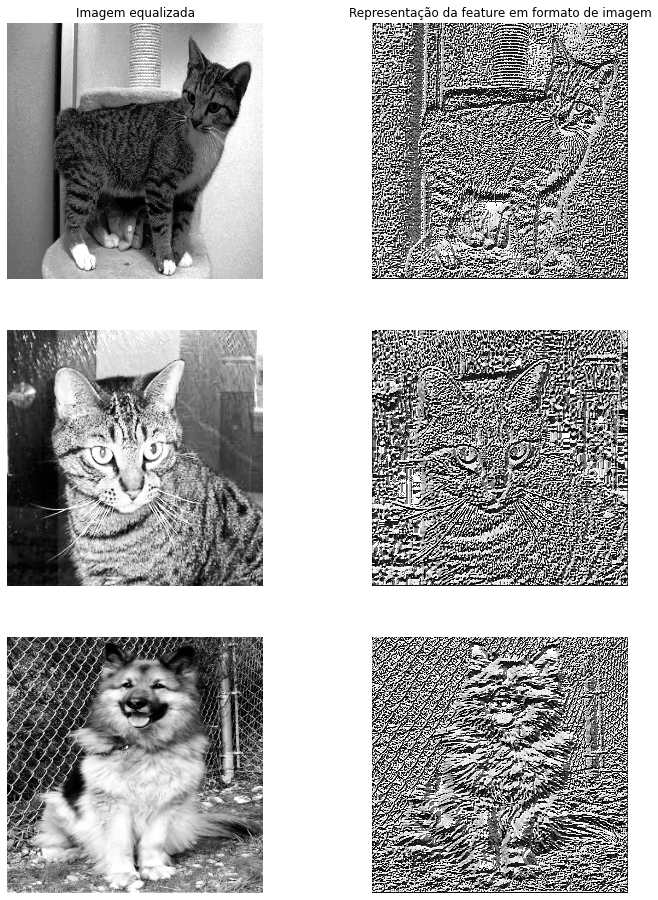

In [4]:
LBP1 = local_binary_pattern(Equalize1, 8, 1.0)
LBP2 = local_binary_pattern(Equalize2, 8, 1.0)
LBP3 = local_binary_pattern(Equalize3, 8, 1.0)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

axes[0, 0].imshow(Equalize1, cmap = plt.cm.gray)
axes[0, 0].set_axis_off()
axes[0, 1].imshow(LBP1, cmap = plt.cm.gray)
axes[0, 1].set_axis_off()

axes[1, 0].imshow(Equalize2, cmap = plt.cm.gray)
axes[1, 0].set_axis_off()
axes[1, 1].imshow(LBP2, cmap = plt.cm.gray)
axes[1, 1].set_axis_off()

axes[2, 0].imshow(Equalize3, cmap = plt.cm.gray)
axes[2, 0].set_axis_off()
axes[2, 1].imshow(LBP3, cmap = plt.cm.gray)
axes[2, 1].set_axis_off()

axes[0, 0].set_title('Imagem equalizada')
axes[0, 1].set_title('Representação da feature em formato de imagem')

#plt.savefig('Relatório/LBP.png', format='png')

plt.show()

### Roteiro II - GLCM

In [5]:
#Create rasters to receive texture and define filenames
def glcm(img):
    contrastraster = np.zeros(img.shape)
    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            count+=1
            #windows needs to fit completely in image
            if i <3 or j <3:        
                continue
            if i > (contrastraster.shape[0] - 1) or j > (contrastraster.shape[0] - 1):
                continue
        
            #Define size of moving window
            glcm_window = img[i-3: i+1, j-3 : j+1]

            #Calculate the grey-level co-occurrence matrix.
            grey_comatrix = greycomatrix(glcm_window, [1], [0])
        
            # Calculate texture properties of a GLCM.
            contrastraster[i,j] = greycoprops(grey_comatrix, 'contrast').reshape(1, -1)
    return(contrastraster)

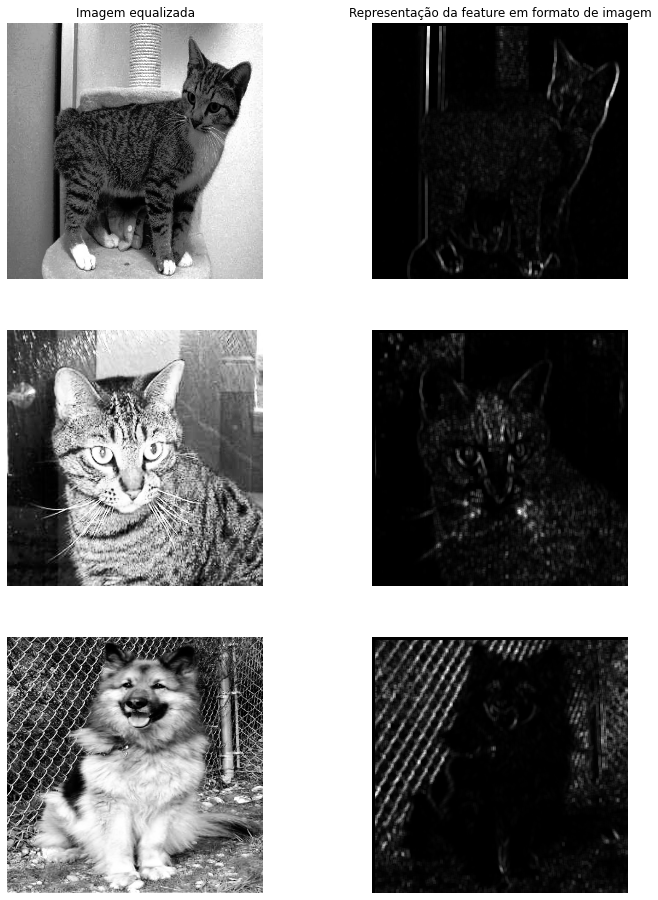

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

axes[0, 0].imshow(Equalize1, cmap = plt.cm.gray)
axes[0, 0].set_axis_off()
axes[0, 1].imshow(glcm(Equalize1), cmap = plt.cm.gray)
axes[0, 1].set_axis_off()

axes[1, 0].imshow(Equalize2, cmap = plt.cm.gray)
axes[1, 0].set_axis_off()
axes[1, 1].imshow(glcm(Equalize2), cmap = plt.cm.gray)
axes[1, 1].set_axis_off()

axes[2, 0].imshow(Equalize3, cmap = plt.cm.gray)
axes[2, 0].set_axis_off()
axes[2, 1].imshow(glcm(Equalize3), cmap = plt.cm.gray)
axes[2, 1].set_axis_off()

axes[0, 0].set_title('Imagem equalizada')
axes[0, 1].set_title('Representação da feature em formato de imagem')

#plt.savefig('Relatório/GLCM.png', format='png')

plt.show()

### Roteiro III - SOBEL

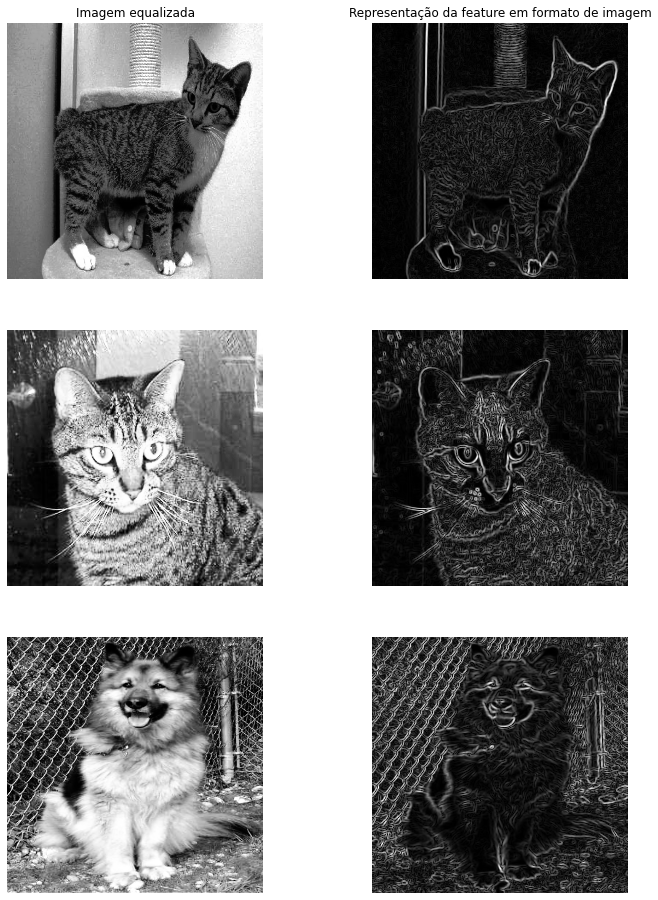

In [7]:
SOBEL1 = sobel(Equalize1)
SOBEL2 = sobel(Equalize2)
SOBEL3 = sobel(Equalize3)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

axes[0, 0].imshow(Equalize1, cmap = plt.cm.gray)
axes[0, 0].set_axis_off()
axes[0, 1].imshow(SOBEL1, cmap = plt.cm.gray)
axes[0, 1].set_axis_off()

axes[1, 0].imshow(Equalize2, cmap = plt.cm.gray)
axes[1, 0].set_axis_off()
axes[1, 1].imshow(SOBEL2, cmap = plt.cm.gray)
axes[1, 1].set_axis_off()

axes[2, 0].imshow(Equalize3, cmap = plt.cm.gray)
axes[2, 0].set_axis_off()
axes[2, 1].imshow(SOBEL3, cmap = plt.cm.gray)
axes[2, 1].set_axis_off()

axes[0, 0].set_title('Imagem equalizada')
axes[0, 1].set_title('Representação da feature em formato de imagem')

#plt.savefig('Relatório/SOBEL.png', format='png')

plt.show()

### Vetorização

In [1]:
from numpy import array, matrix, reshape
from matplotlib.pyplot import subplots, tight_layout
from os.path import basename
from skimage.io import imread, imshow, imsave, ImageCollection
import h5py
import numpy as np

In [2]:
CatsTestHist = ImageCollection("NewDataset/Histogram/Test/Cats/*jpg")
DogsTestHist = ImageCollection("NewDataset/Histogram/Test/Dogs/*jpg")

CatsTestGamma01 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma01/*jpg")
DogsTestGamma01 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma01/*jpg")

CatsTestGamma02 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma02/*jpg")
DogsTestGamma02 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma02/*jpg")

CatsTestGamma03 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma03/*jpg")
DogsTestGamma03 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma03/*jpg")

CatsTestGauss = ImageCollection("NewDataset/Gaussiano/Test/Cats/*jpg")
DogsTestGauss = ImageCollection("NewDataset/Gaussiano/Test/Dogs/*jpg")

CatsTestLP = ImageCollection("NewDataset/Laplace/Test/Cats/*jpg")
DogsTestLP = ImageCollection("NewDataset/Laplace/Test/Dogs/*jpg")

In [3]:
CatsTrainHist = ImageCollection("NewDataset/Histogram/Train/Cats/*jpg")
DogsTrainHist = ImageCollection("NewDataset/Histogram/Train/Dogs/*jpg")

CatsTrainGamma01 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma01/*jpg")
DogsTrainGamma01 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma01/*jpg")

CatsTrainGamma02 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma02/*jpg")
DogsTrainGamma02 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma02/*jpg")

CatsTrainGamma03 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma03/*jpg")
DogsTrainGamma03 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma03/*jpg")

CatsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Cats/*jpg")
DogsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Dogs/*jpg")

CatsTrainLP = ImageCollection("NewDataset/Laplace/Train/Cats/*jpg")
DogsTrainLP = ImageCollection("NewDataset/Laplace/Train/Dogs/*jpg")

In [5]:
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import sobel
from skimage import img_as_ubyte
from pandas import Series, DataFrame

def matriz(nRows):
    matriz = []
    for i in range(nRows):
        row = []
        matriz.append(row)
    return matriz

#### Roteiro I - LBP

In [6]:
#LBP train

Hist = []

for i, files in enumerate(CatsTrainHist):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Hist.insert(i, number)       
for i, files in enumerate(DogsTrainHist):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma01):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gamma01.insert(i, number)

Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTrainGaus):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtrain:
        Laplace.insert(i, number)

In [7]:
LBPTrain = matriz(10000)
LabelTrainLBP = []

for i, rows in enumerate(LBPTrain):
    LBPTrain[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        LabelTrainLBP.insert(i, 0)
    else:
        LabelTrainLBP.insert(i, 1)

    LBPTrain[i] = np.concatenate((LBPTrain[i], LabelTrainLBP[i]), axis = None)
    LBPTrain[i] = LBPTrain[i].astype("uint8")

In [8]:
with h5py.File("LBPtrain.h5", 'w') as hdf:
    hdf.create_dataset('datasettrain', data = LBPTrain)

In [9]:
#LBP test

Hist = []

for i, files in enumerate(CatsTestHist):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma01):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma01.insert(i, number)

Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTestGauss):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Laplace.insert(i, number)

In [10]:
LBPTest = matriz(10000)
LabelTestLBP = []

for i, rows in enumerate(LBPTest):
    LBPTest[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    
    if i< 5000:
        LabelTestLBP.insert(i, 0)
    else:
        LabelTestLBP.insert(i, 1)

    LBPTest[i] = np.concatenate((LBPTest[i], LabelTestLBP[i]), axis = None)
    LBPTest[i] = LBPTrain[i].astype("uint8")

In [11]:
with h5py.File("LBPtest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTest', data = LBPTest)

In [11]:
LBP = DataFrame(LBPTest)
LBP

#### Roteiro II - GLCM

In [12]:
#GLCM train

Hist = []

for i, files in enumerate(CatsTrainHist):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Hist.insert(i, number)
for i, files in enumerate(DogsTrainHist):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma03.insert(i, number)
        
Gauss = []

for i, files in enumerate(CatsTrainGaus):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    GLCMtrain = greycomatrix(files, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Laplace.insert(i, number)

In [13]:
GLCMTrain = matriz(10000)
LabelTrainGLCM = []

for i, rows in enumerate(GLCMTrain):
    GLCMTrain[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    
    if i< 5000:
        LabelTrainGLCM.insert(i, 0)
    else:
        LabelTrainGLCM.insert(i, 1)

    GLCMTrain[i] = np.concatenate((GLCMTrain[i], LabelTrainGLCM[i]), axis = None)
    GLCMTrain[i] = GLCMTrain[i].astype("uint8")

In [14]:
with h5py.File("GLCMtrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetTrainGLCM', data = GLCMTrain)

In [15]:
#GLCM test

Hist = []

for i, img in enumerate(CatsTestHist):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Hist.insert(i, number)
for i, img in enumerate(DogsTestHist):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Hist.insert(i, number)

Gamma01 = []

for i, img in enumerate(CatsTestGamma01):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma01.insert(i, number)
for i, img in enumerate(DogsTestGamma02):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, img in enumerate(CatsTestGamma02):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma02.insert(i, number)
for i, img in enumerate(DogsTestGamma02):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, img in enumerate(CatsTestGamma03):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma03.insert(i, number)
for i, img in enumerate(DogsTestGamma03):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gamma03.insert(i, number)
        
Gauss = []

for i, img in enumerate(CatsTestGauss):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gauss.insert(i, number)
for i, img in enumerate(DogsTestGauss):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Gauss.insert(i, number)
        
Laplace = []

for i, img in enumerate(CatsTestLP):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Laplace.insert(i, number)
for i, img in enumerate(DogsTestLP):
    GLCMtest = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, (3*np.pi)/4, np.pi, (5*np.pi)/4, (3*np.pi)/2, (7*np.pi)/4, 2*np.pi])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast').reshape(1, -1)
    for number in GLCMfeature:
        Laplace.insert(i, number)

In [16]:
GLCMTest = matriz(10000)
LabelTestGLCM = []

for i, rows in enumerate(GLCMTest):
    GLCMTest[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    
    if i< 5000:
        LabelTestGLCM.insert(i, 0)
    else:
        LabelTestGLCM.insert(i, 1)

    GLCMTest[i] = np.concatenate((GLCMTest[i], LabelTestGLCM[i]), axis = None)
    
    GLCMTest[i] = GLCMTest[i].astype("uint8")

In [17]:
with h5py.File("GLCMtest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTestGLCM', data = GLCMTest)

#### Roteiro III - SOBEL

In [18]:
#SOBEL train

Hist = []

for i, files in enumerate(CatsTrainHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTrainHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTrainGaus):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)

In [19]:
SOBELTrain = matriz(10000)
LabelTrainSOBEL = []

for i, rows in enumerate(SOBELTrain):
    SOBELTrain[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    
    if i< 5000:
        LabelTrainSOBEL.insert(i, 0)
    else:
        LabelTrainSOBEL.insert(i, 1)

    SOBELTrain[i] = np.concatenate((SOBELTrain[i], LabelTrainSOBEL[i]), axis = None)
    SOBELTrain[i] = SOBELTrain[i].astype("uint8")

In [20]:
with h5py.File("SOBELtrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetTrainSOBEL', data = SOBELTrain)

In [21]:
#SOBEL test

from skimage.filters import sobel

Hist = []

for i, files in enumerate(CatsTestHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTestGauss):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)

In [22]:
SOBELTest = matriz(10000)
LabelTestSOBEL = []

for i, rows in enumerate(SOBELTest):
    SOBELTest[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    
    if i< 5000:
        LabelTestSOBEL.insert(i, 0)
    else:
        LabelTestSOBEL.insert(i, 1)

    SOBELTest[i] = np.concatenate((SOBELTest[i], LabelTestSOBEL[i]), axis = None)
    SOBELTest[i] = SOBELTest[i].astype("uint8")

In [23]:
with h5py.File("SOBELtest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTestSOBEL', data = SOBELTest)

In [24]:
SOBEL = DataFrame(SOBELTest)